/tmp/ipython-input-338798747.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


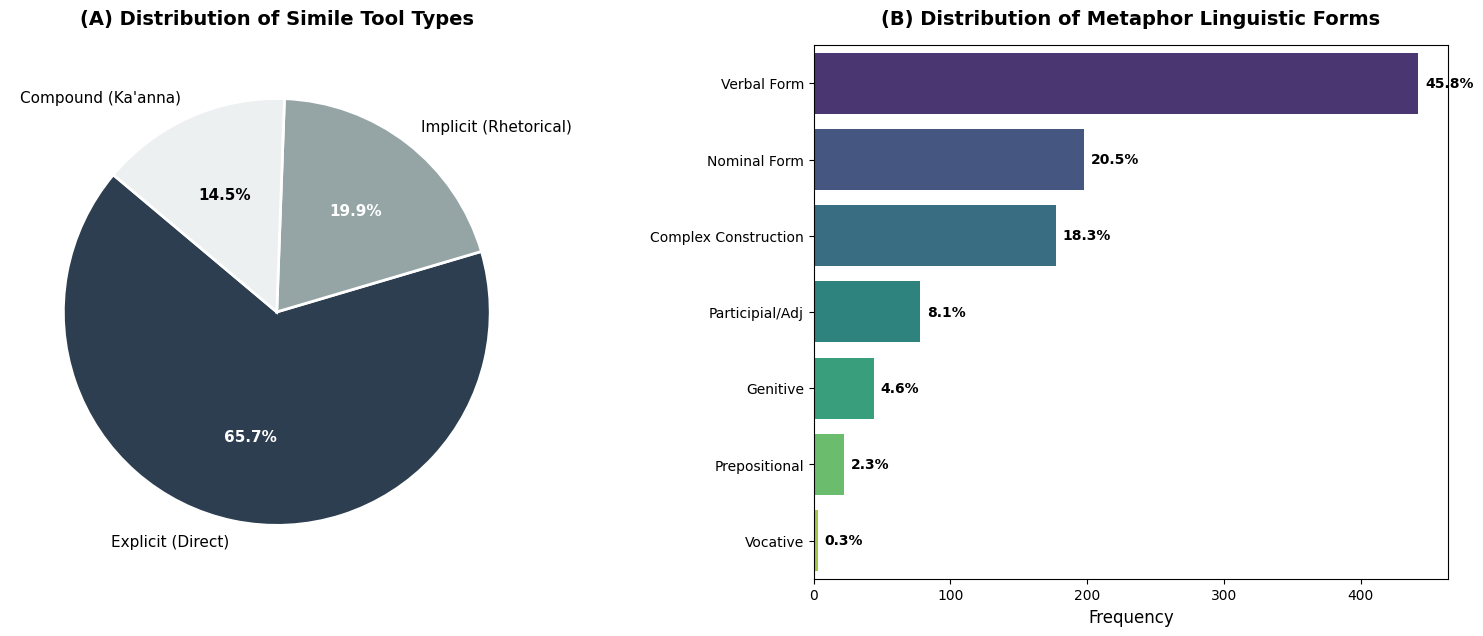

In [ ]:
# @title (A) Distribution of Simile Tool Types, (B) Distribution of Metaphor Linguistic Forms'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------------------------------
# بيانات التشبيه (Similes) - Pie Chart Data
# -------------------------------------------------------
simile_labels = ['Explicit (Direct)', 'Implicit (Rhetorical)', 'Compound (Ka\'anna)']
simile_counts = [268, 81, 59]
simile_colors = ['#2C3E50', '#95A5A6', '#ECF0F1'] # ألوان متدرجة

# -------------------------------------------------------
# بيانات الاستعارة (Metaphors) - Bar Chart Data
# -------------------------------------------------------
metaphor_data = {
    'Form': ['Verbal Form', 'Nominal Form', 'Complex Construction', 'Participial/Adj', 'Genitive', 'Prepositional', 'Vocative'],
    'Count': [442, 198, 177, 78, 44, 22, 3],
    'Percentage': [45.8, 20.5, 18.3, 8.1, 4.6, 2.3, 0.3]
}
df_metaphor = pd.DataFrame(metaphor_data)

# -------------------------------------------------------
# رسم الشكل المدمج (Figure 1: A & B)
# -------------------------------------------------------
# إنشاء شكل يحتوي على لوحتين (1 صف، 2 عمود)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot A: Similes (Pie Chart) ---
wedges, texts, autotexts = ax1.pie(
    simile_counts,
    labels=simile_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=simile_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 11}
)
# تحسين النصوص
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(autotexts[2], color="black") # النص على الخلفية الفاتحة
ax1.set_title('(A) Distribution of Simile Tool Types', fontsize=14, weight='bold', pad=15)


# --- Plot B: Metaphors (Horizontal Bar Chart) ---
sns.barplot(
    data=df_metaphor,
    x='Count',
    y='Form',
    ax=ax2,
    palette='viridis' # أو أي لوحة ألوان تفضلها
)

# إضافة النسب المئوية بجانب الأعمدة
for i, v in enumerate(df_metaphor['Count']):
    ax2.text(v + 5, i, f"{df_metaphor['Percentage'][i]}%", va='center', fontweight='bold', fontsize=10)

ax2.set_title('(B) Distribution of Metaphor Linguistic Forms', fontsize=14, weight='bold', pad=15)
ax2.set_xlabel('Frequency', fontsize=12)
ax2.set_ylabel('') # إزالة تسمية المحور Y لأن الأسماء واضحة

# -------------------------------------------------------
# ضبط التصميم النهائي وحفظ الصورة
# -------------------------------------------------------
plt.tight_layout(pad=3.0) # مسافة بين الرسمين
plt.show()

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Successfully loaded 965 records.

📊 RESULTS: METAPHOR LINGUISTIC FORMS (N=965)

Main Category                  | Count | Percentage
--------------------------------------------------
Verbal Form                    | 442   | 45.8%
Nominal Form                   | 198   | 20.5%
Complex Construction           | 177   | 18.3%
Participial/Adjectival         | 78    | 8.1%
Genitive Construction          | 44    | 4.6%
Prepositional/Relational       | 22    | 2.3%
Vocative                       | 3     | 0.3%
Particle-Based                 | 1     | 0.1%

📝 Dominant Form: **Verbal Form** (45.8%)


/tmp/ipython-input-2990094561.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=main_counts.values, y=main_counts.index, palette=palette)


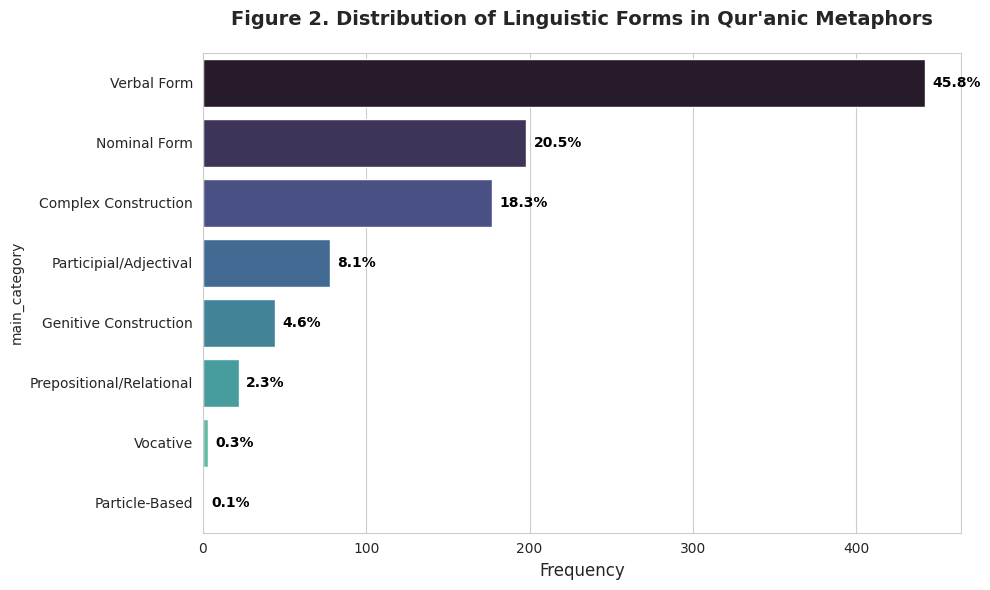

In [ ]:
# @title 3. تحليل الأنماط النحوية
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE & LOAD DATA
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_data = json.load(f)
    print(f"✅ Successfully loaded {len(raw_data)} records.")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}")
    raw_data = []

# ---------------------------------------------------------
# 2. TAXONOMY MAPPING
# ---------------------------------------------------------
sub_to_main_map = {
    # 1. Verbal Form
    'verbal_past': 'Verbal Form',
    'verbal_imperfect': 'Verbal Form',
    'verbal_imperative': 'Verbal Form',
    'verbal_passive': 'Verbal Form',

    # 2. Nominal Form
    'nominal_common': 'Nominal Form',
    'nominal_proper': 'Nominal Form',
    'nominal_masdar': 'Nominal Form',
    'nominal_abstract': 'Nominal Form',

    # 3. Participial / Adjectival
    'adj_descriptive': 'Participial/Adjectival',
    'adj_participle': 'Participial/Adjectival',
    'adj_mubalaghah': 'Participial/Adjectival',

    # 4. Prepositional / Relational
    'prep_simple': 'Prepositional/Relational',
    'prep_complex': 'Prepositional/Relational',
    'adverbial_relational': 'Prepositional/Relational',

    # 5. Genitive / Idafa Construction
    'idafa_simple': 'Genitive Construction',
    'idafa_extended': 'Genitive Construction',
    'idafa_metonymic': 'Genitive Construction',

    # 6. Vocative
    'vocative_direct': 'Vocative',
    'vocative_personified': 'Vocative',

    # 7. Particle-Based
    'particle_compound': 'Particle-Based',
    'particle_emphasis': 'Particle-Based',
    'particle_conditional': 'Particle-Based',

    # 8. Complex Construction
    'clausal_metaphor': 'Complex Construction',
    'complex_construction': 'Complex Construction',
    'extended_imagery': 'Complex Construction',
    'multi_unit_blend': 'Complex Construction'
}

# ---------------------------------------------------------
# 3. PROCESS DATA (Correct Path Extraction)
# ---------------------------------------------------------
processed_rows = []

for record in raw_data:
    try:
        # Access the list of similes (metaphors in this case)
        similes_list = record.get('rhetorical_analysis', {}).get('similes', [])

        for item in similes_list:
            # 🔽 HERE IS THE FIX: Access 'components' -> 'metaphor_linguistic_form'
            components = item.get('components', {})
            sub_category = components.get('metaphor_linguistic_form')

            # If found and valid, map it
            if sub_category and sub_category in sub_to_main_map:
                processed_rows.append({
                    'record_id': record.get('record_id'),
                    'sub_category': sub_category,
                    'main_category': sub_to_main_map[sub_category]
                })

    except Exception as e:
        continue # Skip malformed records

df = pd.DataFrame(processed_rows)

# ---------------------------------------------------------
# 4. REPORT & VISUALIZATION
# ---------------------------------------------------------
if not df.empty:
    main_counts = df['main_category'].value_counts()
    main_pct = df['main_category'].value_counts(normalize=True) * 100

    print("\n" + "="*60)
    print(f"📊 RESULTS: METAPHOR LINGUISTIC FORMS (N={len(df)})")
    print("="*60)

    print(f"\n{'Main Category':<30} | {'Count':<5} | {'Percentage'}")
    print("-" * 50)
    for cat, count in main_counts.items():
        print(f"{cat:<30} | {count:<5} | {main_pct[cat]:.1f}%")

    dominant = main_counts.idxmax()
    print(f"\n📝 Dominant Form: **{dominant}** ({main_pct[dominant]:.1f}%)")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    # Using a distinct palette for clarity
    palette = sns.color_palette("mako", len(main_counts))

    ax = sns.barplot(x=main_counts.values, y=main_counts.index, palette=palette)

    plt.title('Figure 2. Distribution of Linguistic Forms in Qur\'anic Metaphors', fontsize=14, weight='bold', pad=20)
    plt.xlabel('Frequency', fontsize=12)

    for i, v in enumerate(main_counts.values):
        ax.text(v + (max(main_counts.values)*0.01), i, f'{main_pct[main_counts.index[i]]:.1f}%',
                color='black', va='center', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid coded data found. Please inspect the JSON structure again.")
    # Debugging aid: Print structure of first record if failed
    if raw_data:
        print("\nDEBUG: Structure of first record components:")
        try:
            print(raw_data[0]['rhetorical_analysis']['similes'][0]['components'])
        except:
            print("Could not access components path.")